# Figures Notebook For Article Titled Dublin Traffic Congestion During the COVID-19 Pandemic 

The Figures are for the article under submission titled Dublin Traffic Congestion During the COVID-19 Pandemic. Please refer the article for more details. 

In [22]:
# Author: Negin Zarbakhsh

In [1]:
#import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import datetime
from termcolor import colored

In [2]:
PATH = 'C:/Users/Negee/Article 2 -  Feburay 2022/Notebook_for_figures/Data/'

In [3]:
# Plots Styles
plt.rcdefaults() 
sns.set_style("whitegrid")
sns.set_style('ticks')

# COVID-19 Visualization

## European Centre for Disease Prevention and Control Dataset

This plot shows the 14-days rate COVID-19 in Ireland

In [4]:
# Data From European Centre for Disease Prevention and Control
incident = pd.read_csv(PATH + 'Rate_14_covid.csv')

In [5]:
# Filtering Ireland
incident_Ireland = incident[incident['country']== 'Ireland']
#Filtering Date Periods
incident_Ireland = incident_Ireland[(incident_Ireland['year_week']>= '2021-19') & (incident_Ireland['year_week']< '2022-01')]
#Storing Coulumn Names
keys = incident_Ireland.keys()
# Filtering certain 
incident_Ireland2 = incident_Ireland.loc[ : , keys[1]:keys[-2]]
#rish NUTS 2 and NUTS 3 region divisions
region_name = incident_Ireland2.region_name.unique()

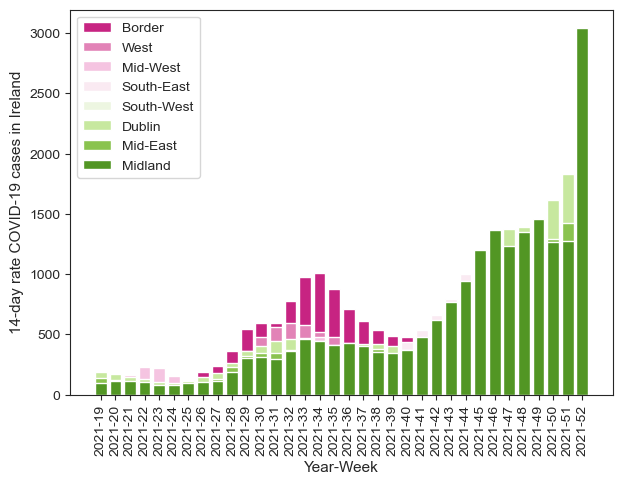

In [6]:
x = incident_Ireland2.year_week.unique()
# Specifying Colors pf Plot
color=sns.color_palette("PiYG", 8)
# Make a Plot
fig, ax = plt.subplots(figsize=(7, 5))
for i in range (0, len(region_name)):
    plt.bar(x, incident_Ireland2[incident_Ireland2.region_name == region_name[i]]['rate_14_day_per_100k'].to_list(),
            color=color[i], label=region_name[i])
    
plt.xticks(rotation=90)
#set x_axis & y_axis Label 
ax.set_ylabel("14-day rate COVID-19 cases in Ireland",fontsize=11)
ax.set_xlabel ("Year-Week", fontsize =11)
plt.legend()

plt.show()
# save the plot as a file
fig.savefig('Irelandcounty.pdf',
            format='pdf',
            dpi=1800,
            bbox_inches='tight')

## John Hopkings COVID-19 Data Analysis (Ireland)

#### Time series summary (csse_covid_19_time_series)

In [7]:
# Number of Confirmed Cases
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv', parse_dates= True)
# Number of Death
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv' , parse_dates= True)

# Filtering Data for Republic of Ireland
confirmed_df = confirmed_df[confirmed_df['Country/Region'] == 'Ireland']

In [8]:
#Storing Columns names
cols = confirmed_df.keys()
#Filtering the date of columns for both number of death & Cases for Ireland
confirmed = confirmed_df.loc[:, cols[42]:cols[-1]]
deaths = deaths_df.loc[:, cols[42]:cols[-1]]

In [9]:
# Specifying the dates
dates = confirmed.keys()

# Storing the number of cases, death and mortality rate in list 
Ireland_cases = []
Ireland_death = [] 
Ireland_mortality_rate = []

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    
    # confirmed, deaths, recovered, and active
    Ireland_cases.append(confirmed_sum)
    Ireland_death.append(death_sum)
    
    # calculate rates
    Ireland_mortality_rate.append(death_sum/confirmed_sum)
    average_mortality = np.mean(Ireland_mortality_rate) 
    
##################################################################################################
print(colored('\n Overview of COVID Situation in Ireland:\n' ,'green', attrs=['bold']))   
# Situation in Ireland
print ('From {} to {} :\n Ireland has witnessed the Total number:\n Confirmed Cases : {} ,\n Death : {} & \n Average Mortality Rate : {} '
       .format (cols[4:][0],
                 cols[4:][-1],
                confirmed_sum,
                death_sum,average_mortality))
#####################################################################################################


 Overview of COVID Situation in Ireland:

From 1/22/20 to 2/22/22 :
 Ireland has witnessed the Total number:
 Confirmed Cases : 1280058 ,
 Death : 5905942 & 
 Average Mortality Rate : 33.211714053472406 


In [10]:
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

def moving_average(data, window_size):
    moving_average = []
    for i in range(len(data)):
        if i + window_size < len(data):
            moving_average.append(np.mean(data[i:i+window_size]))
        else:
            moving_average.append(np.mean(data[i:len(data)]))
    return moving_average

# window size for average
window = 7

# confirmed cases
Irelanddaily_increase = daily_increase(Ireland_cases)
Irelandconfirmed_avg = moving_average(Ireland_cases, window)
Irelanddaily_increase_avg = moving_average(Irelanddaily_increase, window)

# deaths
Irelanddaily_death = daily_increase(Ireland_death)
Irelanddeath_avg = moving_average(Ireland_death, window)
Irelanddaily_death_avg = moving_average(Irelanddaily_death, window)

# Creat an array of Ireland cases and death for 
Ireland_cases = np.array(Ireland_cases)
Ireland_death = np.array(Ireland_death)

##### # Converting the list of dates to number starting from 29 Frburary to the last date of covid for plotting

In [11]:
# Converting the list of dates to number starting from 29 Frburary to the last date of covid for plotting
dates

Index(['2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20',
       '3/7/20', '3/8/20', '3/9/20',
       ...
       '2/13/22', '2/14/22', '2/15/22', '2/16/22', '2/17/22', '2/18/22',
       '2/19/22', '2/20/22', '2/21/22', '2/22/22'],
      dtype='object', length=725)

In [12]:
# Changing date to numbers and flatteb them for visualization
number_dates = np.array([i for i in range(len(dates))]).reshape(-1, 1).flatten()

In [13]:
def Ireland_plot(x, y1, y2):

    confirmed_avg = moving_average(y1, window)
    confirmed_increase_avg = moving_average(y2, window)
       
    fig, ax = plt.subplots(figsize=(7, 5))
    
    ax.plot(x, y1, color ="#c994c7",linestyle='--',linewidth=2.5)
    ax.legend(['Ireland Confirmed Cases'], prop={'size': 10}, loc= 'upper right')
    plt.xticks(rotation=0)
    
    #Set x_axis Label
    ax.set_xlabel ("Days since 29 Feburary 2020", fontsize =14)
    ax.set_ylabel('# of cases in Ireland', size=14)

    # Twin axes for showing the number of confirmed cases in Ireland
    ax2=ax.twinx()
    ax2.bar(x, y2, color ='#7fcdbb', edgecolor="#7fcdbb")
    ax2.plot(x, confirmed_increase_avg, color='#fec44f', linestyle='dashed', linewidth=2, label = 'Daily Increase in Confirmed Cases')
    ax2.legend(['Moving Average {} Days'.format(window), 'Ireland Daily Increase in Confirmed Cases'], prop={'size': 10}, loc= 'upper left')    
    plt.show()
    
# save the plot as a file
    fig.savefig('Ireland_COVID.pdf',
            format='pdf',
            dpi=1800,
            bbox_inches='tight')    

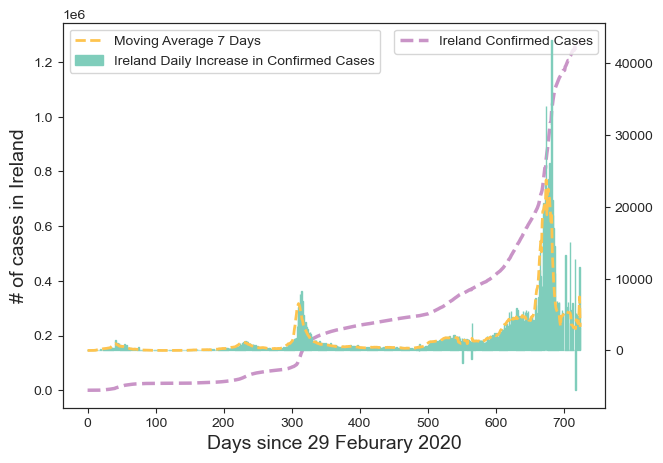

In [14]:
Ireland_plot (number_dates , Ireland_cases, Irelanddaily_increase)

### Traffic in Dublin

In [15]:
traffic =  pd.read_csv(PATH + "tomtom_trafic_index.csv", parse_dates=True,  index_col= 'date')

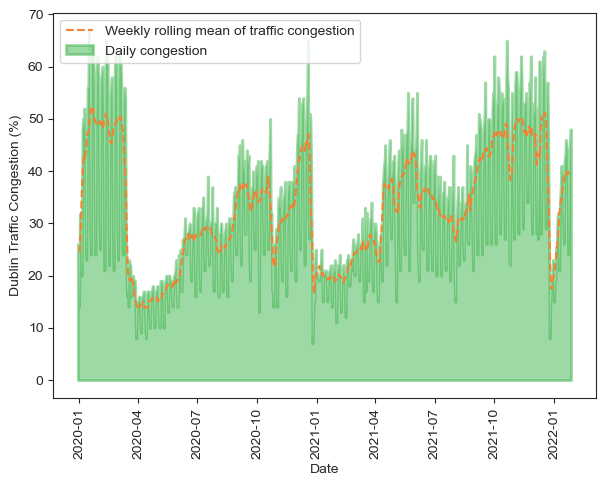

In [16]:
#7 days rooling (mean of traffic congestion)
rolling = traffic["congestion"].rolling(7, center=True).mean()

# Plot
fig, ax = plt.subplots(figsize=(7,5))
plt.fill_between(traffic.index, y1 = traffic["congestion"].values,alpha=0.5,
                 linewidth=2, color='#3cb44b', label = 'Daily congestion')

ax.plot(rolling, linestyle='--', linewidth=1.5, label='Weekly rolling mean of traffic congestion', color='seagreen')
plt.gca().get_lines()[0].set_color("#f58231")

plt.legend(fontsize =10, loc = 'upper left')
plt.ylabel('Dublin Traffic Congestion (%)')
plt.xlabel('Date');
plt.xticks(rotation=90)
plt.show()

# save the plot as a file
fig.savefig('timeseries.pdf',
            format='pdf',
            dpi=1800,
            bbox_inches='tight')

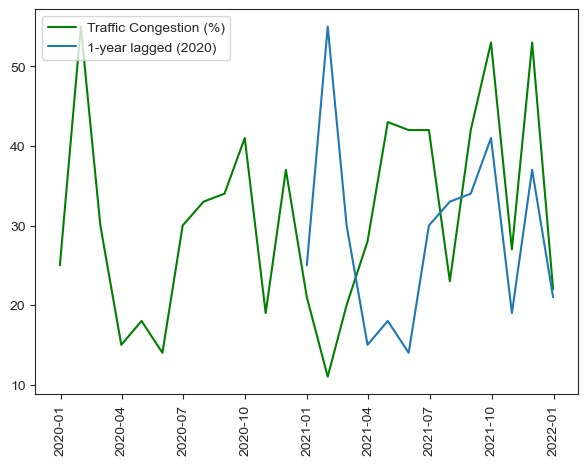

In [17]:
# Plot traffic congestion (monthly frequence) along with its 1-year lagged series

fig, ax = plt.subplots(figsize=(7, 5))

monthly_congestion = traffic["congestion"].asfreq('M')
ax.plot(monthly_congestion, label= 'Dublin Traffic Congestion (%)', color="green")  
shifted = traffic["congestion"].asfreq('M').shift(12)
ax.plot(shifted, label='1-year lagged (2020) actual')
ax.legend(['Traffic Congestion (%)', '1-year lagged (2020)'])
plt.xticks(rotation=90)
plt.show()

# save the plot as a file
fig.savefig('lag1year.pdf',
            format='pdf',
            dpi=1800,
            bbox_inches='tight')

### Mobility Changes Parks Street Waste 

This plot shows the mobility changes in parks in Ireland along with the parks waste data and level of government restrictions

In [18]:
#read the integerated and clean file
parks = pd.read_csv(PATH + "Parks.csv", parse_dates=True)

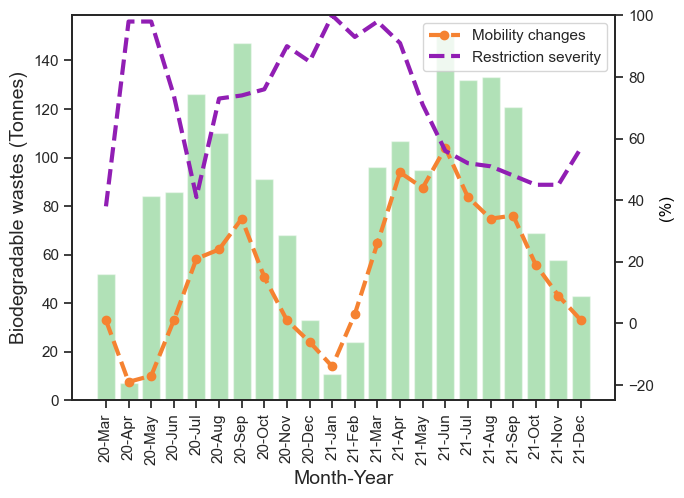

In [19]:
#Set the aesthetic style of the plots.
sns.set()
sns.set_style("whitegrid")
sns.set_style('ticks')
sns.color_palette("Paired")


fig, ax = plt.subplots(figsize=(7, 5))
# Make a Plot
ax.bar(parks.Date, parks.Net_weight, color = "#3cb44b" ,  alpha=0.4, label ='Biodegradable wastes (Tonnes)')
plt.xticks(rotation=90)
#Set x_axis Label
ax.set_xlabel ("Month-Year", fontsize =14)
#set y_axis Label 
ax.set_ylabel("Biodegradable wastes (Tonnes)",fontsize=14)

ax2=ax.twinx()
plt.ylim([-25, 100])

# make a plot with different y-axis using second axis object
ax2.plot(parks.Date, parks.Parks_mobility_changes,
         color ="#f58231",marker="o", linestyle='--',linewidth=3,label = 'Mobility changes ')
ax2.plot(parks.Date, parks.Restriction_severity,
         color ="#911eb4",linestyle='--',linewidth=3, label = 'Restriction severity')

ax2.set_ylabel("Mobility changes in parks (%)",color="red",fontsize=14)
ax2.set_ylabel("(%)",fontsize=12, color = 'black')
plt.legend()

plt.show()

# save the plot as a file
fig.savefig('Biodegradable wate.pdf',
            format='pdf',
            dpi=1800,
            bbox_inches='tight')

### Figure Street Waste & Public Holidays in Ireland

In [20]:
df2 = pd.read_csv('C:/Users/Negee/Article 2 -  Feburay 2022/Final Data/Wasteandholidays.csv', parse_dates=True)
color=sns.color_palette("pastel")

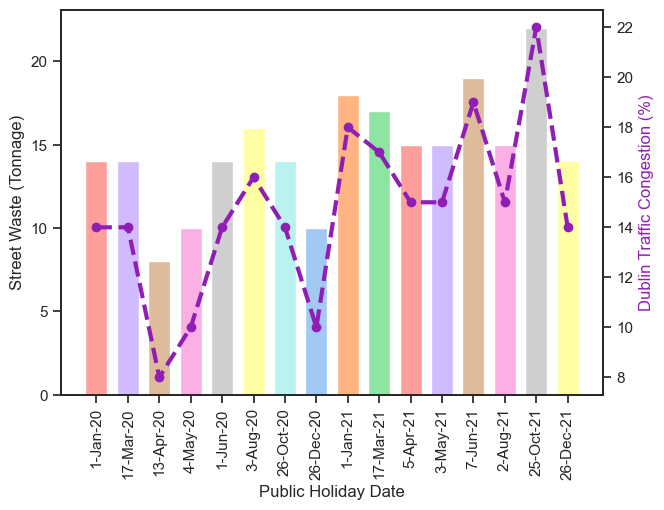

In [21]:
width = 0.7

date = df2['date'].to_list()
labels = df2['Calender'].to_list()
fig, ax = plt.subplots(figsize=(7, 5)) 
label = np.unique(df2['Calender'])

for i in range(16):
    bar = ax.bar(date[i], df2['Congestion'][i], width, color = color[i-7] )
  #  plt.legend(np.unique(df2['Calender'][i]), fontsize =8 )
    
plt.xticks(rotation=90)
plt.xlabel("Public Holiday Date")
plt.ylabel('Street Waste (Tonnage)')
ax2=ax.twinx()
ax2.set_ylabel("Dublin Traffic Congestion (%)",fontsize=12, color = 'black')
plt.xticks(rotation=90)
ax2.yaxis.label.set_color('#911eb4')



# make a plot with different y-axis using second axis object
ax2.plot(df2['date'], df2.Congestion,  color ="#911eb4",marker="o", linestyle='--',linewidth=3)
plt.xticks(rotation=90) 
#plt.legend(bar, label)
plt.show()
# save the plot as a file
fig.savefig('holiday.png',
            format='png',
            dpi=1800,
            bbox_inches='tight')